In [5]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_stopwords(df, col)
#        soon    possible
df = tp.remove_extra_spaces(df, col)
# soon possible
# '''

# features: only comment after processing

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_stopwords(df, col)\n#        soon    possible\ndf = tp.remove_extra_spaces(df, col)\n# soon possible\n# '

In [6]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [7]:
data = DataLoader()
X_train, X_test, y_train, y_test = data.datasets

Elapsed Time: 155.835 seconds
RandomForestClassifier(criterion='entropy', max_depth=33, min_samples_leaf=3,
                       min_samples_split=19, n_estimators=700)
Train Accuracy: 0.7665, F1: [0.8079 0.7358 0.7646 0.7454]
Test  Accuracy: 0.5855, F1: [0.6875 0.4706 0.5545 0.5618]


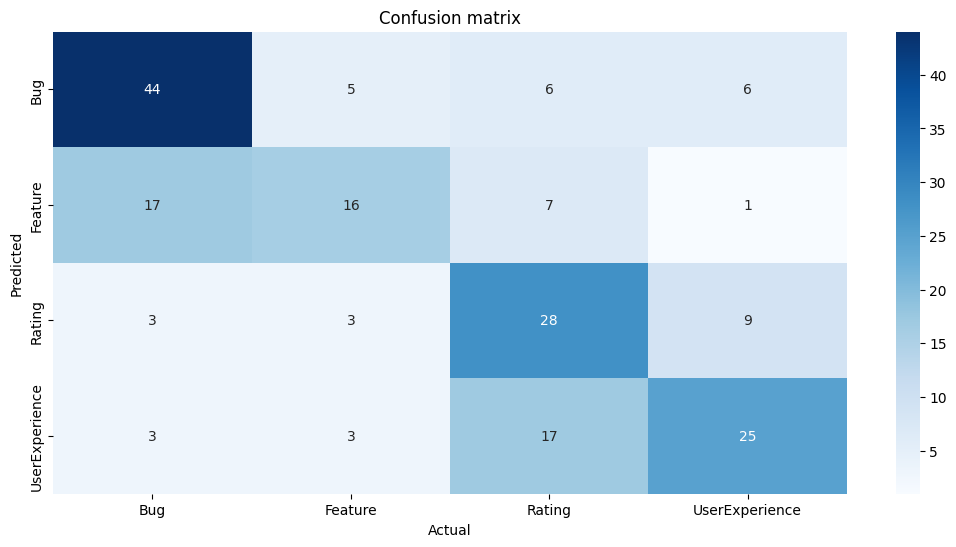

Elapsed Time: 8.203 seconds
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=32)
Train Accuracy: 0.6914, F1: [0.7353 0.6756 0.7013 0.638 ]
Test  Accuracy: 0.4767, F1: [0.5289 0.4146 0.486  0.4474]


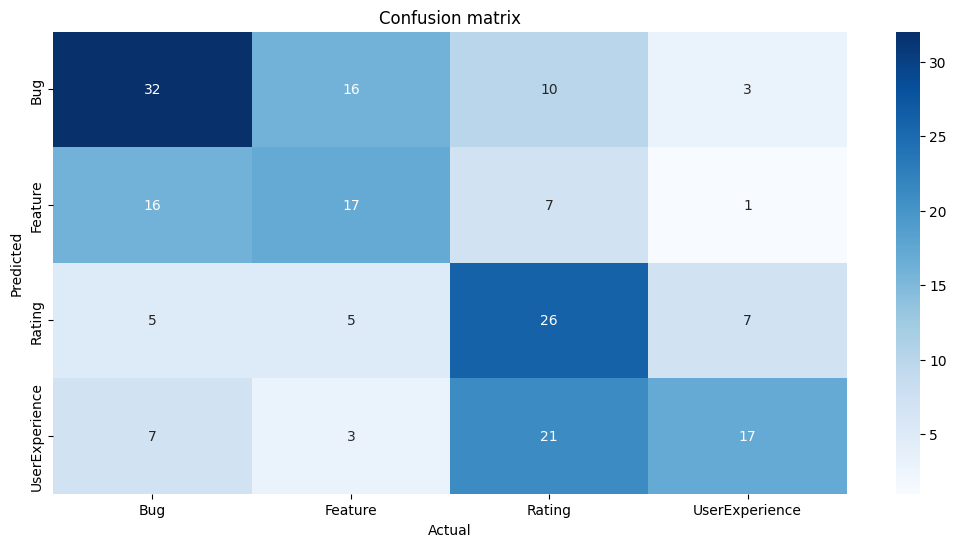

Elapsed Time: 25.5355 seconds
LinearSVC(C=0.1, dual=False)
Train Accuracy: 0.6694, F1: [0.7143 0.5263 0.7085 0.6727]
Test  Accuracy: 0.5959, F1: [0.6825 0.5278 0.5567 0.5714]


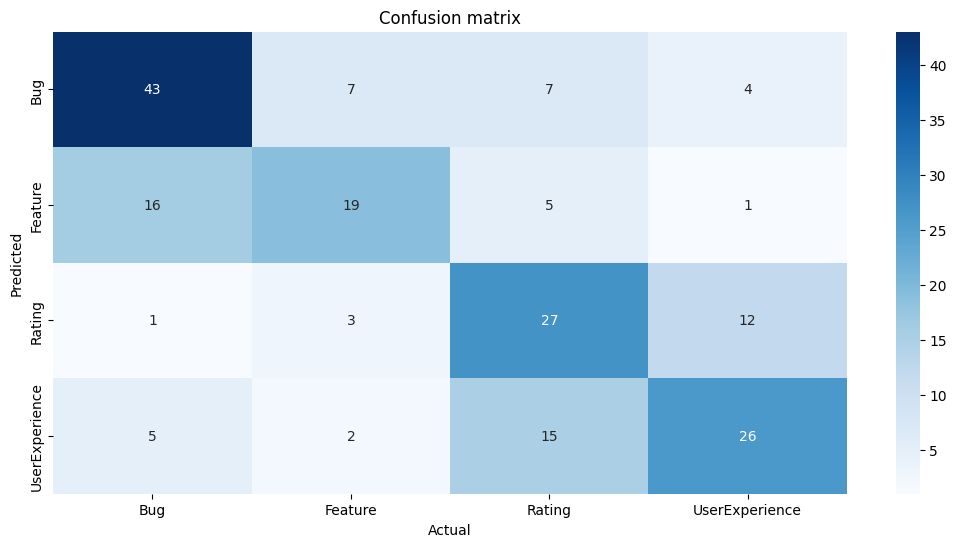

Elapsed Time: 2.7723 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=100, dual=False),
                   learning_rate=0.01)
Train Accuracy: 0.6731, F1: [0.7166 0.5481 0.7041 0.6821]
Test  Accuracy: 0.6062, F1: [0.6885 0.5789 0.551  0.5778]


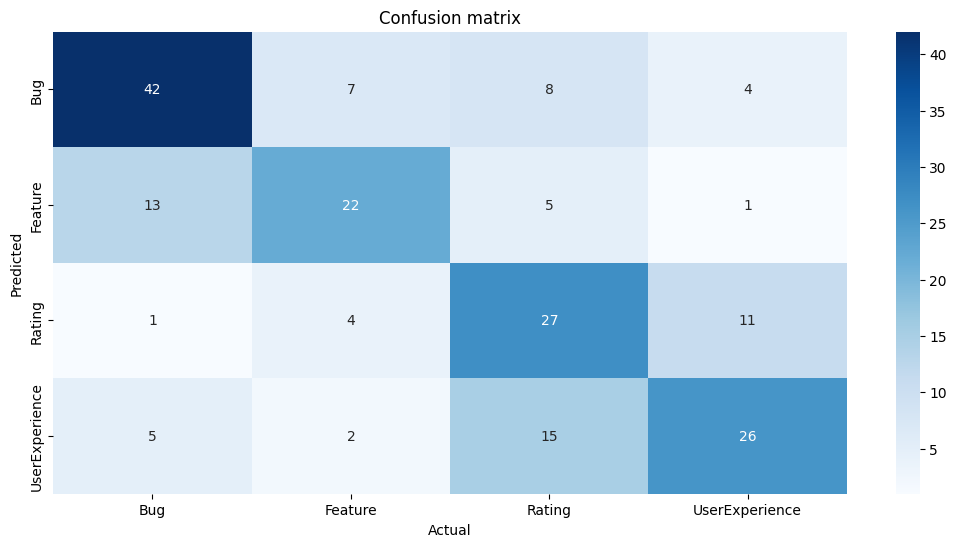

Elapsed Time: 134.5844 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8594684429901511, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.37863034132781603, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.11180801990588245, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=109, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.7885, F1: [0.8383 0.7722 0.7815 0.7565]
Test  Accuracy: 0.6062, F1: [0.6723 0.48   0.6154 0.6136]


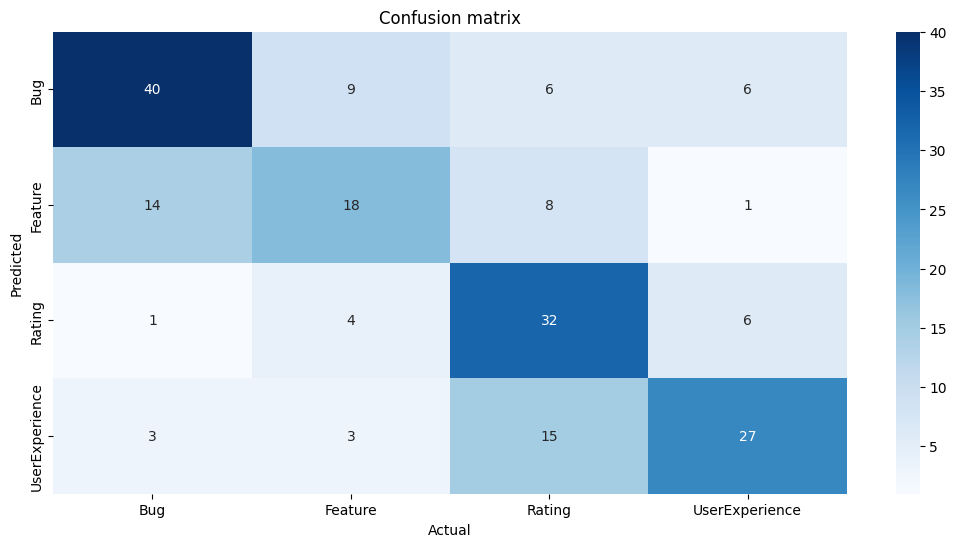

In [8]:
clfs = [RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost]

for clf in clfs:
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)